### What we try to do:

* Develop an Automated EDA (Exploratory Data Analysis) tool using Python.
* The tool simplifies EDA by automating data preprocessing and visualization.
* Supports various data formats: CSV, Excel, and SQL databases.
* Identifies column data types and performs appropriate preprocessing steps.
* Preprocessing includes handling missing values, encoding categories, scaling numerical features, etc.
* Provides options for feature selection and dimensionality reduction.
* Focuses on facilitating analysis of large datasets.
* Generates comprehensive visualization dashboards for each column type.
* Visualization types include histograms, box plots, scatter plots, and more.
* Utilizes Python libraries: Matplotlib, Seaborn, and Plotly for interactive visualizations.
* Offers user-friendly command-line interface.
* Involves stages of designing, implementing, testing, and debugging.
* Aim is to ensure the functionality and effectiveness of the tool.

#### Startingg with Data File Type Handling
#### Process data type 
#### Try handling Catagorical Data
<img src="https://4.bp.blogspot.com/-buUvpUjdd_E/W0HCq0aD5jI/AAAAAAAAARs/_tT6KizKRVoniavaNdxXlPqdJEdfjKdxgCLcBGAs/s1600/tenor.gif" alt="Smaller Image" width="300">


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

def load_data(file_path, file_type):
    if file_type == 'csv':
        data = pd.read_csv(file_path)
    elif file_type == 'excel':
        data = pd.read_excel(file_path)
    elif file_type == 'sql':
        if db_connection is None:
            raise ValueError("Please provide a database connection string.")
        engine = create_engine(db_connection)
        query = "SELECT * FROM your_table_name"
        data = pd.read_sql(query, engine)
    else:
        raise ValueError("Unsupported file type.")

    return data

def preprocess_data(data):
    numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = identify_categorical_features(data)  # Assuming you have this function defined

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    data[numerical_features] = imputer.fit_transform(data[numerical_features])

    # One-hot encode categorical features
    data = pd.get_dummies(data, columns=[feature for feature, _ in categorical_features])

    # Scale numerical features
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data

def identify_categorical_features(data):
    categorical_features = data.select_dtypes(include=['object']).columns
    binary_features = []

    for feature in categorical_features:
        unique_values = data[feature].nunique()
        if unique_values == 2:
            binary_features.append((feature, 'binary'))
        else:
            binary_features.append((feature, 'categorical'))

    return binary_features


#### Add as much plots as you want and need for your visuals🌸

In [40]:
from matplotlib.backends.backend_pdf import PdfPages
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define your data loading and preprocessing functions here

def create_scatter_plot(data, feature):
    fig = px.scatter(data, x=feature, y='Total', title=f'Scatter Plot of {feature}')
    return fig

def create_pie_plot(data, feature):
    feature_counts = data[feature].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Pie Plot of {feature}')
    plt.show()

def create_bar_plot(data, feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Bar Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

def create_histogram(ax, data, feature):
    sns.histplot(data[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.show()

def create_box_plot(ax, data, feature):
    sns.boxplot(x=data[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    plt.tight_layout()
    plt.show()

def create_visualizations_for_column(data, column_name):
    fig_histogram, ax_histogram = plt.subplots(figsize=(8, 6))
    create_histogram(ax_histogram, data, column_name)

    fig_box_plot, ax_box_plot = plt.subplots(figsize=(8, 6))
    create_box_plot(ax_box_plot, data, column_name)

    fig_scatter_plot = create_scatter_plot(data, column_name)
    fig_pie_plot = create_pie_plot(data, column_name)
    fig_bar_plot = create_bar_plot(data, column_name)

    figures = [fig_histogram, fig_box_plot, fig_pie_plot, fig_bar_plot]
    return figures, fig_scatter_plot  

#### User don't see your main so get theor file path and type 
#### Ask for the certain coloumn they want to visual (:

Enter the path of the file:  /kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv
Enter the file type (csv/excel/sql):  csv


All Features:
Index(['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac',
       'airlineid', 'carriergroup', 'Scheduled', 'Charter',
       ...
       'carrier_ZL', 'carrier_ZN', 'carrier_ZP', 'carrier_ZQ', 'carrier_ZS',
       'carrier_ZUQ', 'carrier_ZV', 'carrier_ZW', 'carrier_ZX',
       'type_Departures'],
      dtype='object', length=3800)


Enter the column name to visualize:  Year


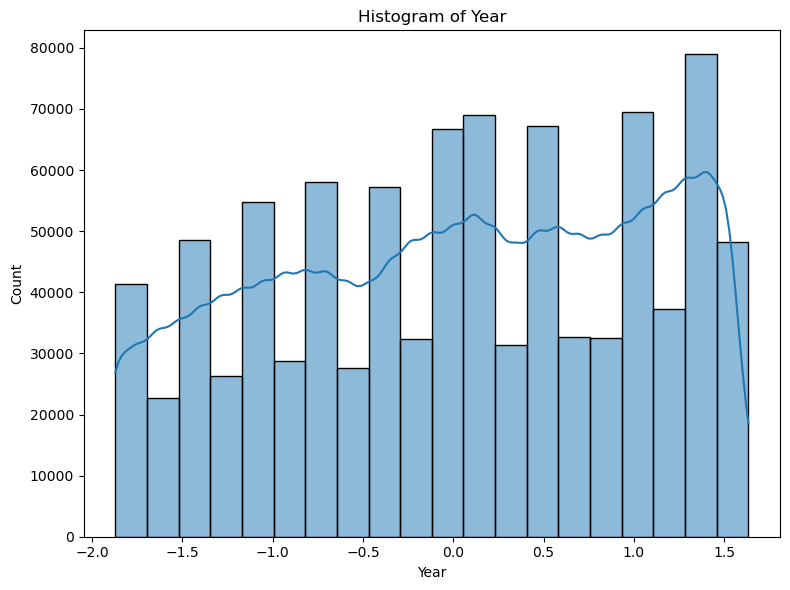

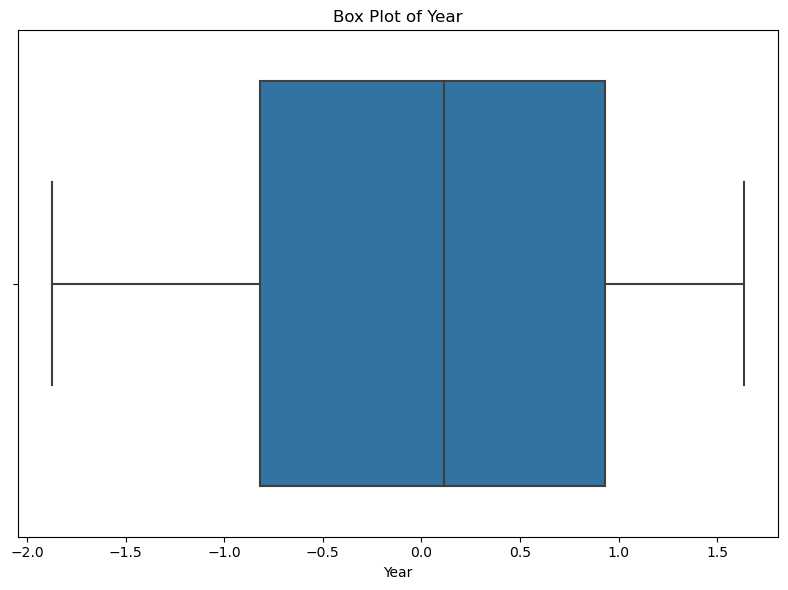

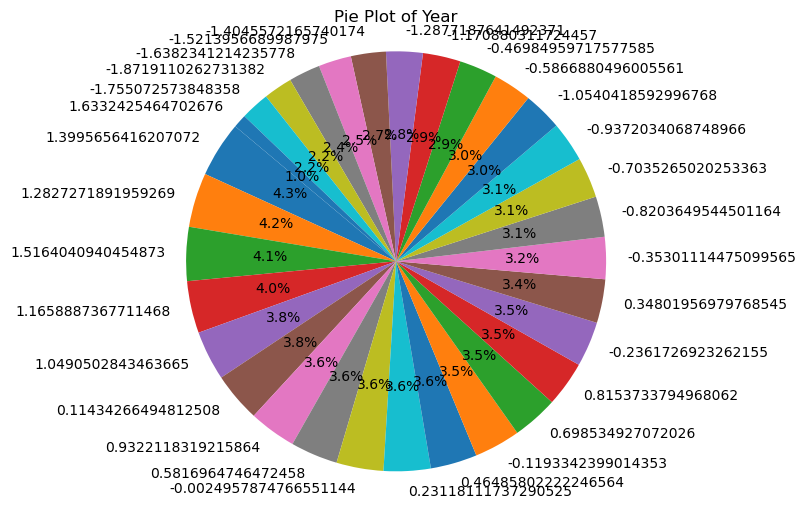

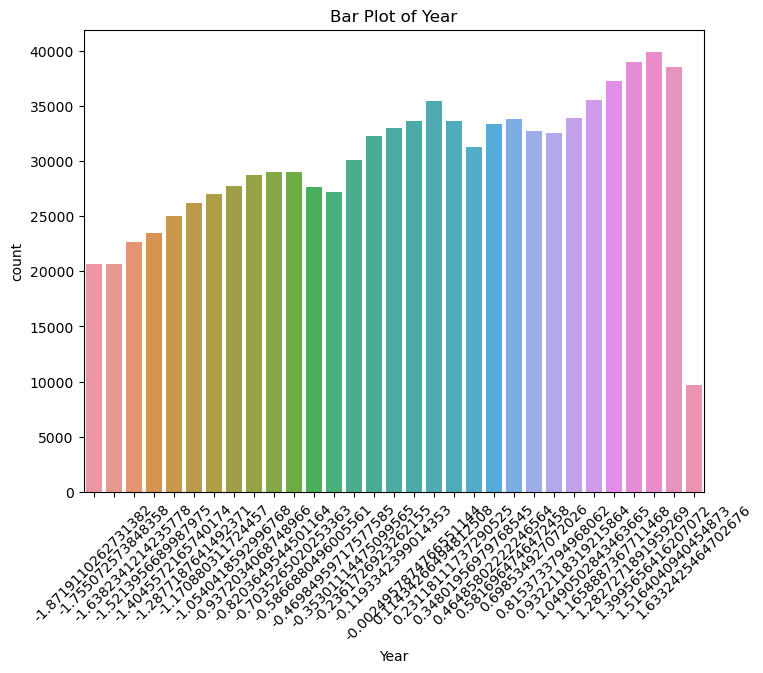

In [48]:
def main():
    # Get user input for file path and file type
    file_path = input("Enter the path of the file: ")
    file_type = input("Enter the file type (csv/excel/sql): ")

    # Load and preprocess data
    data = load_data(file_path, file_type)
    preprocessed_data = preprocess_data(data)

    # Print all features
    print("All Features:")
    print(preprocessed_data.columns)

    # Choose a specific column to visualize
    column_to_visualize = input("Enter the column name to visualize: ")

    # Generate all types of plots for the chosen column
    figures, _ = create_visualizations_for_column(preprocessed_data, column_to_visualize)

if __name__ == '__main__':
    main()

#### Run the following in another enviroment to see your Interface

In [46]:
# For an Interface 

"""
import tkinter as tk
from tkinter import ttk

def visualize_data():
    # Load and preprocess data
    file_path = file_path_entry.get()
    file_type = file_type_combobox.get()
    data = load_data(file_path, file_type)
    preprocessed_data = preprocess_data(data)

    # Get the chosen column to visualize
    column_to_visualize = column_entry.get()

    # Generate all types of plots for the chosen column
    figures, _ = create_visualizations_for_column(preprocessed_data, column_to_visualize)
    
    # Display the generated plots in the second half of the window
    for fig in figures:
        canvas = FigureCanvasTkAgg(fig, master=visual_frame)
        canvas.get_tk_widget().pack()

# Create the main window
root = tk.Tk()
root.title("Automated EDA Tool")

# Create and position the input widgets in the first half of the window
input_frame = tk.Frame(root)
input_frame.pack(padx=20, pady=20)

file_path_label = tk.Label(input_frame, text="File Path:")
file_path_label.grid(row=0, column=0, sticky="w")
file_path_entry = tk.Entry(input_frame)
file_path_entry.grid(row=0, column=1, padx=10)

file_type_label = tk.Label(input_frame, text="File Type:")
file_type_label.grid(row=1, column=0, sticky="w")
file_type_combobox = ttk.Combobox(input_frame, values=["csv", "excel", "sql"])
file_type_combobox.grid(row=1, column=1, padx=10)

column_label = tk.Label(input_frame, text="Column to Visualize:")
column_label.grid(row=2, column=0, sticky="w")
column_entry = tk.Entry(input_frame)
column_entry.grid(row=2, column=1, padx=10)

visual_button = tk.Button(input_frame, text="Visualize", command=visualize_data)
visual_button.grid(row=3, columnspan=2, pady=10)

# Create and position a frame for visualizations in the second half of the window
visual_frame = tk.Frame(root)
visual_frame.pack(padx=20, pady=20)

# Start the GUI event loop
root.mainloop()
"""

'\nimport tkinter as tk\nfrom tkinter import ttk\n\ndef visualize_data():\n    # Load and preprocess data\n    file_path = file_path_entry.get()\n    file_type = file_type_combobox.get()\n    data = load_data(file_path, file_type)\n    preprocessed_data = preprocess_data(data)\n\n    # Get the chosen column to visualize\n    column_to_visualize = column_entry.get()\n\n    # Generate all types of plots for the chosen column\n    figures, _ = create_visualizations_for_column(preprocessed_data, column_to_visualize)\n    \n    # Display the generated plots in the second half of the window\n    for fig in figures:\n        canvas = FigureCanvasTkAgg(fig, master=visual_frame)\n        canvas.get_tk_widget().pack()\n\n# Create the main window\nroot = tk.Tk()\nroot.title("Automated EDA Tool")\n\n# Create and position the input widgets in the first half of the window\ninput_frame = tk.Frame(root)\ninput_frame.pack(padx=20, pady=20)\n\nfile_path_label = tk.Label(input_frame, text="File Path:")\n

### I really like to alawys save visuals in a PDF File or .h5ad ,however I didn't succed in doing it as it alawys return None ):

### If you succeeded in solving the issue please acknowledge me (:

In [42]:
! pip install anndata

In [43]:
# Can't find a way to save plot fig in pdf or png or even h5ad file 
# Any ideas to solve the issue would be great (:

"""
import anndata

def save_plots_to_h5ad(file_path, file_type, column_to_visualize):
    # Load and preprocess data
    data = load_data(file_path, file_type)
    preprocessed_data = preprocess_data(data)

    # Print all features
    print("All Features:")
    print(preprocessed_data.columns)

    # Generate all types of plots for the chosen column
    figures, scatter_plot = create_visualizations_for_column(preprocessed_data, column_to_visualize)

    # Save plots in an H5AD file
    h5ad_file_path = 'plots.h5ad'
    adata = anndata.AnnData()
    adata.uns['figures'] = figures
    adata.uns['scatter_plot'] = scatter_plot
    adata.write(h5ad_file_path)

    print(f"Plots saved to {h5ad_file_path}")

# Call the function with your desired parameters
file_path = '/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv'
file_type = 'csv'  # This is already CSV format
column_to_visualize = 'Year'
save_plots_to_h5ad(file_path, file_type, column_to_visualize)
"""

'\nimport anndata\n\ndef save_plots_to_h5ad(file_path, file_type, column_to_visualize):\n    # Load and preprocess data\n    data = load_data(file_path, file_type)\n    preprocessed_data = preprocess_data(data)\n\n    # Print all features\n    print("All Features:")\n    print(preprocessed_data.columns)\n\n    # Generate all types of plots for the chosen column\n    figures, scatter_plot = create_visualizations_for_column(preprocessed_data, column_to_visualize)\n\n    # Save plots in an H5AD file\n    h5ad_file_path = \'plots.h5ad\'\n    adata = anndata.AnnData()\n    adata.uns[\'figures\'] = figures\n    adata.uns[\'scatter_plot\'] = scatter_plot\n    adata.write(h5ad_file_path)\n\n    print(f"Plots saved to {h5ad_file_path}")\n\n# Call the function with your desired parameters\nfile_path = \'/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv\'\nfile_type = \'csv\'  # This is already CSV format\ncolumn_to_visualize = \'Year\'\nsave_plots_to_h5ad(file_p

### Happy Coding (^^)
